# Επεξεργασία Φυσικής Γλώσσας (Natural Language Processing)

Για την επεξεργασία φυσικής γλώσσας χρησιμοποιούμε το [Natural Language Toolkit](http://www.nltk.org/).

Περισσότερα θα δείτε στο [nltk book](http://www.nltk.org/book/)

In [1]:
import numpy as np
import nltk

Το NLTK από μόνο του έχει μόνο τις πολύ βασικές λειτουργίες. Για πιο σύνθετα πράγματα (τα οποία θα χρειαστούμε) χρειάζεται να κατεβάσουμε επιπλέον υλικό. Όταν τρέχουμε τοπικά την Python, αυτό μπορούμε να το κάνουμε μέσω της εντολής `nltk.download()`, η οποία ανοίγει ένα παράθυρο όπου επιλέγουμε ποιες λειτουργίες μάς ενδιαφέρει να κατεβάσουμε. Στις cloud πλατφόρμες αυτό δεν είναι δυνατό, γι' αυτό πρέπει να τα κατεβάζουμε ένα ένα τα επιπλέον πακέτα, όπως θα δούμε παρακάτω.

## Άνοιγμα κειμένων

### Από βιβλιοθήκη της python

Στα πλαίσια της άσκησης θα χρησιμοποιήσουμε το [reuters dataset](https://archive.ics.uci.edu/ml/datasets/reuters-21578+text+categorization+collection). Αυτό μπορείτε να το βρείτε και μέσω του NLTK:

In [2]:
nltk.download('reuters') # κατεβάζουμε το dataset

from nltk.corpus import reuters # το κάνουμε import

print 'The dataset has a total of {} categories:'.format(len(reuters.categories()))
print reuters.categories()

[nltk_data] Downloading package reuters to /gpfs/fs01/user/s440-f39bd9
[nltk_data]     62225440-fe8dadcb5f83/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
The dataset has a total of 90 categories:
[u'acq', u'alum', u'barley', u'bop', u'carcass', u'castor-oil', u'cocoa', u'coconut', u'coconut-oil', u'coffee', u'copper', u'copra-cake', u'corn', u'cotton', u'cotton-oil', u'cpi', u'cpu', u'crude', u'dfl', u'dlr', u'dmk', u'earn', u'fuel', u'gas', u'gnp', u'gold', u'grain', u'groundnut', u'groundnut-oil', u'heat', u'hog', u'housing', u'income', u'instal-debt', u'interest', u'ipi', u'iron-steel', u'jet', u'jobs', u'l-cattle', u'lead', u'lei', u'lin-oil', u'livestock', u'lumber', u'meal-feed', u'money-fx', u'money-supply', u'naphtha', u'nat-gas', u'nickel', u'nkr', u'nzdlr', u'oat', u'oilseed', u'orange', u'palladium', u'palm-oil', u'palmkernel', u'pet-chem', u'platinum', u'potato', u'propane', u'rand', u'rape-oil', u'rapeseed', u'reserves', u'retail', u'rice', u'rubber', 

Στην κάθε μια από αυτές τις κατηγορίες ανήκουν κείμενα, τα οποία μπορούμε να δούμε με την εντολή `reuters.fileids('όνομα κατηγορίας')`.

<Container object of 90 artists>

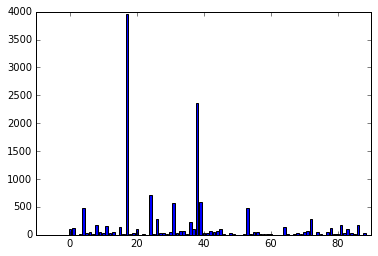

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

reuters.categories()

category_files = {}
for cat in reuters.categories():
    category_files[cat] = len(reuters.fileids(cat))

plt.bar(range(len(category_files)), category_files.values(), align='center')

### Από το internet

Σημείωση: Ο παρακάτω κώδικας δεν θα τρέξει στο περιβάλλον του Microsoft Azure. Ο λόγος είναι ότι το Azure δεν επιτρέπει την πρόσβαση σε εξωτερικά URLs για να αποφύγει τη χρήση των notebooks σε denial of service (DoS) attacks. Μπορείτε να τον τρέξετε τοπικά στον υπολογιστή σας.

In [4]:
import urllib
url = 'http://www.gutenberg.org/files/2554/2554-0.txt' # ορίζουμε το url που περιέχει το κείμενο
response = urllib.urlopen(url) # στέλνουμε το request
raw = response.read().decode('utf8') # αποθηκεύουμε το κείμενο σε ένα string
print raw[:600], '...'

﻿The Project Gutenberg EBook of Crime and Punishment, by Fyodor Dostoevsky

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: Crime and Punishment

Author: Fyodor Dostoevsky

Release Date: March 28, 2006 [EBook #2554]
Last Updated: October 27, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK CRIME AND PUNISHMENT ***


...


### Από τοπικό αρχείο 

Έστω ότι έχω ένα αρχείο στον υπολογιστή μου με όνομα `mydoc.txt`. Για λόγους απλότητας το αρχείο αυτό βρίσκεται στον ίδιο φάκελο με το notebook.

In [5]:
# Ο παρακάτω κώδικας δεν θα τρέξει στο περιβάλλον του IBM Data Science Experience.

#f = open('mydoc.txt', 'r') # Η πρώτη παράμετρος είναι το όνομα του αρχείου. Αν δεν ήταν στον ίδιο φάκελο θα έβαζα 
                           # ολόκληρο το path
                           # Η δεύτερη παράμετρος είναι το mode στο οποίο ανοίγω το αρχείο:
                           # 'r' --> read, 'w' --> write, 'a' --> append, κτλ

In [6]:
# Ο παρακάτω κώδικας είναι μόνο για το περιβάλλον του IBM Data Science Experience.

from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_6855329bf6234cbab4d9298aa9d10b45(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_ee63424e44d2866a1af52aad91e78cabc07af90f','domain': {'id': 'a373b77d42c545dbba5c4781cd738a0e'},
            'password': 'Gvjx-n]V76mxEykV'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

# Your data file was loaded into a StringIO object and you can process the data.
# Please read the documentation of pandas to learn more about your possibilities to load your data.
# pandas documentation: http://pandas.pydata.org/pandas-docs/stable/io.html
f = get_object_storage_file_with_credentials_6855329bf6234cbab4d9298aa9d10b45('neuralnetworks', 'mydoc.txt')

In [7]:
document = ''
for line in f:
    document += line

f.close() # κλείνουμε το αρχείο

print document

Commerce Secretary Malcolm Baldrige
said he supported efforts to persuade newly-industrialized
countries (NICS) to revalue currencies that are tied to the
dollar in order to help the United States cut its massive trade
deficit.
    "We do need to do something with those currencies or we
will be substituting Japanese products for Taiwanese products,"
or those of other nations with currencies tied to the dollar,
Baldrige told a House banking subcommittee.
    The U.S. dollar has declined in value against the Yen and
European currencies, but has changed very little against the
currencies of some developing countries such as South Korea and
Taiwan because they are linked to the value of the dollar.
    As a result, efforts to reduce the value of the dollar over
the past year and a half have done little to improve the trade
deficits with those countries.
    Baldrige told a House Banking subcommittee that the
Treasury Department was attempting to persuade those countries
to reach agreement 

Για να μην χρειάζεται να θυμόμαστε να κλείνουμε το αρχείο μόλις το χρησιμοποιήσουμε, το ίδιο αποτέλεσμα με την παραπάνω εντολή θα μπορούσαμε να το πετύχουμε και έτσι.

```
with open('mydoc.txt', 'r') as f:
    document = ''
    for line in f:
        document += line
```
Ο τρόπος αυτός θεωρείται και πιο σωστός.

## Επεξεργασία string

Τώρα που φορτώσαμε το κείμενο στην python, πρέπει να το επεξεργαστούμε. Επειδή ο υπολογιστής θεωρεί τα κεφαλαία και τα μικρά ως διαφορετικούς χαρακτήρες, το πρώτο πράγμα που πρέπει να κάνουμε είναι να τα κάνουμε **όλα μικρά**. Έπειτα θέλουμε να **χωρίσουμε τις λέξεις μια προς μια**, ώστε να φτιάξουμε μια λίστα τα στοιχεία της οποίας θα είναι οι λέξεις.

In [8]:
document = document.lower()

nltk.download('punkt') # χρειάζεται για το tokenizer
words = nltk.word_tokenize(document)

print words

[nltk_data] Downloading package punkt to /gpfs/fs01/user/s440-f39bd962
[nltk_data]     225440-fe8dadcb5f83/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[u'commerce', u'secretary', u'malcolm', u'baldrige', u'said', u'he', u'supported', u'efforts', u'to', u'persuade', u'newly-industrialized', u'countries', u'(', u'nics', u')', u'to', u'revalue', u'currencies', u'that', u'are', u'tied', u'to', u'the', u'dollar', u'in', u'order', u'to', u'help', u'the', u'united', u'states', u'cut', u'its', u'massive', u'trade', u'deficit', u'.', u'``', u'we', u'do', u'need', u'to', u'do', u'something', u'with', u'those', u'currencies', u'or', u'we', u'will', u'be', u'substituting', u'japanese', u'products', u'for', u'taiwanese', u'products', u',', u"''", u'or', u'those', u'of', u'other', u'nations', u'with', u'currencies', u'tied', u'to', u'the', u'dollar', u',', u'baldrige', u'told', u'a', u'house', u'banking', u'subcommittee', u'.', u'the', u'u.s.', u'dollar', u'has', u'declined', u'i

Το tokenizer ουσιαστικά κάνει ό,τι και η built-in μέθοδος `.split()` των string, αλλά λίγο πιο έξυπνα. Για αρχή χωρίζει με βάση τόσο τα κενά (`' '`), όσο και τα tabs (`'\t'`) και τα new lines (`'\n'`). Επίσης όπως μπορούμε να δούμε και παραπάνω χωρίζει και τις παρενθέσεις από το περιεχόμενό τους.

Το επόμενο βήμα είναι να διαγράψουμε από τη λίστα μας τα **σημεία στίξης**. Μόλις το κάνουμε αυτό, θέλουμε να διαγράψουμε και μερικές συχνά χρησιμοποιούμενες λέξεις που δεν προσφέρουν σημασιολογική αξία στο κείμενο (**stopwords**). 

In [9]:
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά
from nltk.corpus import stopwords
import string

'''
filtered_words = [word for word in words if word not in list(string.punctuation)] # το string.punctuation είναι απλά ένα
                                                                                  # string που περιέχει όλα τα σημεία στίξης

filtered_words = [word for word in filtered_words if word not in stopwords.words('english')] # το stopwords.words('english')
                                                                                             # είναι μια λίστα που περιέχει
                                                                                             # stopwords στα αγγλικά
'''
filtered_words = [word for word in words if word not in stopwords.words('english') + list(string.punctuation)]

print filtered_words
#print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /gpfs/fs01/user/s440-f39b
[nltk_data]     d962225440-fe8dadcb5f83/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[u'commerce', u'secretary', u'malcolm', u'baldrige', u'said', u'supported', u'efforts', u'persuade', u'newly-industrialized', u'countries', u'nics', u'revalue', u'currencies', u'tied', u'dollar', u'order', u'help', u'united', u'states', u'cut', u'massive', u'trade', u'deficit', u'``', u'need', u'something', u'currencies', u'substituting', u'japanese', u'products', u'taiwanese', u'products', u"''", u'nations', u'currencies', u'tied', u'dollar', u'baldrige', u'told', u'house', u'banking', u'subcommittee', u'u.s.', u'dollar', u'declined', u'value', u'yen', u'european', u'currencies', u'changed', u'little', u'currencies', u'developing', u'countries', u'south', u'korea', u'taiwan', u'linked', u'value', u'dollar', u'result', u'efforts', u'reduce', u'value', u'dollar', u'past', u'year', u'half', u'done', u'little', u

Πρέπει να κάνουμε καλύτερη δουλειά στην αφαίρεση των σημείων στίξης γιατί δεν αφαιρούνται οι λέξεις που περιέχουν περισσότερα από ένα τέτοια σημεία.

In [10]:
def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words
        
filtered_words = thorough_filter(filtered_words)
print filtered_words

[u'commerce', u'secretary', u'malcolm', u'baldrige', u'said', u'supported', u'efforts', u'persuade', u'newly-industrialized', u'countries', u'nics', u'revalue', u'currencies', u'tied', u'dollar', u'order', u'help', u'united', u'states', u'cut', u'massive', u'trade', u'deficit', u'need', u'something', u'currencies', u'substituting', u'japanese', u'products', u'taiwanese', u'products', u'nations', u'currencies', u'tied', u'dollar', u'baldrige', u'told', u'house', u'banking', u'subcommittee', u'u.s.', u'dollar', u'declined', u'value', u'yen', u'european', u'currencies', u'changed', u'little', u'currencies', u'developing', u'countries', u'south', u'korea', u'taiwan', u'linked', u'value', u'dollar', u'result', u'efforts', u'reduce', u'value', u'dollar', u'past', u'year', u'half', u'done', u'little', u'improve', u'trade', u'deficits', u'countries', u'baldrige', u'told', u'house', u'banking', u'subcommittee', u'treasury', u'department', u'attempting', u'persuade', u'countries', u'reach', u'ag

## Stemming & Lemmatization

Για γραμματικούς λόγους, τα κείμενα χρησιμοποιούν διαφορετικές μορφές μιας λέξης, όπως π.χ. *play*, *plays*, *playing*, *played*. Αυτό έχει σαν αποτέλεσμα πως, ενώ αναφερόμαστε στην ίδια λέξη, ο υπολογιστής τις καταλαβαίνει ως διαφορετικές. Για να λύσουμε αυτό το πρόβλημα, μπορούμε να χρησιμοποιήσουμε δύο γλωσσολογικούς μετασχηματισμούς, είτε την αφαίρεση της κατάληξης (stemming), είτε τη λημματοποίηση (lemmatization). Ο στόχος, τόσο της αφαίρεσης κατάληξης όσο και της λημματοποίησης, είναι να φέρουν τις διάφορες μορφές της λέξης σε μια κοινή μορφή βάσης. Πιο συγκεκριμένα:

Η **αφαίρεση της κατάληξης** αναφέρεται σε μια ακατέργαστη ευριστική διαδικασία που απομακρύνει τα άκρα των λέξεων με την ελπίδα να επιτύχει αυτό το στόχο σωστά τις περισσότερες φορές.

Η **λημματοποίηση** αναφέρεται στην απομάκρυνση της κλίσης των λέξεων και στην επιστροφή της μορφής της λέξης όπως θα τη βρίσκαμε στο λεξικό, με τη χρήση λεξιλογίου και μορφολογικής ανάλυσης των λέξεων. Η μορφή αυτή είναι γνωστή ως λήμμα (*lemma*).

In [11]:
nltk.download('wordnet') # απαραίτητα download για τους stemmer/lemmatizer
nltk.download('rslp')

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

lem_words = [wordnet_lemmatizer.lemmatize(word) for word in filtered_words]
stem_words = [porter_stemmer.stem(word) for word in filtered_words]

print '\n{:<20} {:<20} {:<20}'.format('Original', 'Stemmed', 'Lemmatized')
print '-'*60
for i in range(len(filtered_words)):
    print '{:<20} {:<20} {:<20}'.format(filtered_words[i], stem_words[i], lem_words[i])

[nltk_data] Downloading package wordnet to /gpfs/fs01/user/s440-f39bd9
[nltk_data]     62225440-fe8dadcb5f83/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package rslp to /gpfs/fs01/user/s440-f39bd9622
[nltk_data]     25440-fe8dadcb5f83/nltk_data...
[nltk_data]   Package rslp is already up-to-date!

Original             Stemmed              Lemmatized          
------------------------------------------------------------
commerce             commerc              commerce            
secretary            secretari            secretary           
malcolm              malcolm              malcolm             
baldrige             baldrig              baldrige            
said                 said                 said                
supported            support              supported           
efforts              effort               effort              
persuade             persuad              persuade            
newly-industrialized newly-

Αφότου έχουμε ολοκληρώσει τις γλωσσολογικές προεπεξεργασίες, μπορούμε να προχωρήσουμε στο πρόβλημα της ομαδοποίησης των κειμένων. Πιο συγκεκριμένα θέλουμε να δούμε ποιοι όροι (λέξεις) είναι πιο σημαντικοί για κάθε ομάδα. Πρώτο βήμα όμως είναι η αναπαράσταση των προτάσεων σε διανύσματα. 

## Bag of Words

Μέσω του μοντέλου αυτού, βρίσκουμε τους μοναδικούς όρους μέσα στο σύνολο κειμένων μας και μετράμε τον αριθμό εμφάνισης του καθενός.

In [12]:
doc = 'four three two one four two three four three four' # ένα τυχαίο string στο οποίο θα εφαρμόσουμε το bag of words

from collections import Counter # στην python αυτό γίνεται πολύ εύκολα μέσω του Counter

cnt = Counter(doc.split())
print cnt

Counter({'four': 4, 'three': 3, 'two': 2, 'one': 1})


Θα ορίσουμε ένα νέο σύνολο κειμένων για να πραγματοποιήσουμε τα επόμενα βήματα. Όπως θα δούμε παρακάτω περιμένουμε τα πρώτα δύο και τα τελευταία δύο κείμενα να βρίσκονται πολύ κοντά μεταξύ τους.

In [13]:
# Το νέο σύνολο κειμένων μας
documents = ["Lionel Messi is the best football player in the world! Messi plays for Barcelona Football Club. Barcelona Football Club plays in the Spanish Primera Division.",
            "Lionel Messi a football player, playing for Barcelona Football Club, a Spanish football team.", 
            "Barcelona is a city in a northern spanish province called Catalonia. It is the largest city in Catalonia and the second most populated spanish city.", 
            "Python is a programming language. Python is an object-oriented programming language. Unlike COBOL, Python is a interpreted programming language.", 
            "COBOL is a compiled computer programming language designed for business use. This programming language is imperative, procedural and, since 2002, object-oriented. But Python is better."]

def preprocess_document(document):
    # όλα τα προηγούμενα βήματα που κάναμε μέχρι στιγμίς
    words = nltk.word_tokenize(document.lower())
    filtered_words = [word for word in words if word not in stopwords.words('english') + list(string.punctuation)]
    filtered_words = thorough_filter(filtered_words)
    stemmed_words = [porter_stemmer.stem(wordnet_lemmatizer.lemmatize(word)) for word in filtered_words]
    cnt = Counter(stemmed_words)
    return cnt

preprocessed_documents = [preprocess_document(doc) for doc in documents]

for doc in preprocessed_documents:
    print doc

Counter({u'footbal': 3, u'club': 2, u'messi': 2, u'play': 2, u'barcelona': 2, u'primera': 1, u'divis': 1, u'player': 1, u'spanish': 1, u'world': 1, u'best': 1, u'lionel': 1})
Counter({u'footbal': 3, u'club': 1, u'messi': 1, u'team': 1, u'play': 1, u'barcelona': 1, u'player': 1, u'spanish': 1, u'lionel': 1})
Counter({u'citi': 3, u'spanish': 2, u'catalonia': 2, u'northern': 1, u'provinc': 1, u'largest': 1, u'barcelona': 1, u'second': 1, u'call': 1, u'popul': 1})
Counter({u'python': 3, u'program': 3, u'languag': 3, u'object-ori': 1, u'unlik': 1, u'cobol': 1, u'interpret': 1})
Counter({u'program': 2, u'languag': 2, u'compil': 1, u'busi': 1, u'use': 1, u'comput': 1, u'python': 1, u'imper': 1, u'2002': 1, u'object-ori': 1, u'design': 1, u'procedur': 1, u'better': 1, u'cobol': 1, u'sinc': 1})


Για να απλοποιήσουμε το πρόβλημά μας, μπορούμε να πετάξουμε τους όρους που εμφανίζονται μόνο μία φορά.

In [14]:
threshold = 1

total_counter = preprocessed_documents[0]
for i in range(1, len(preprocessed_documents)):
    total_counter += preprocessed_documents[i] # counter που περιέχει τα συνολικά αθροίσματα σε όλα τα κείμενα

print total_counter, '\n'

vocabulary = [word for word in total_counter if total_counter[word] > threshold] # σβήνουμε τους όρους που εμφανίζονται πιο σπάνια

print vocabulary

Counter({u'footbal': 6, u'languag': 5, u'program': 5, u'python': 4, u'spanish': 4, u'barcelona': 4, u'messi': 3, u'citi': 3, u'play': 3, u'club': 3, u'object-ori': 2, u'player': 2, u'cobol': 2, u'lionel': 2, u'catalonia': 2, u'compil': 1, u'comput': 1, u'procedur': 1, u'second': 1, u'imper': 1, u'busi': 1, u'northern': 1, u'divis': 1, u'call': 1, u'best': 1, u'largest': 1, u'better': 1, u'use': 1, u'provinc': 1, u'world': 1, u'sinc': 1, u'interpret': 1, u'popul': 1, u'unlik': 1, u'2002': 1, u'primera': 1, u'team': 1, u'design': 1}) 

[u'object-ori', u'messi', u'python', u'player', u'cobol', u'spanish', u'languag', u'footbal', u'citi', u'program', u'lionel', u'play', u'club', u'catalonia', u'barcelona']


Για την ευκολία μας θα δημιουργήσουμε έναν πίνακα που στις γραμμές του θα έχει τα documents και στις στήλες του τις λέξεις και θα αποθηκεύσουμε μέσα σε αυτόν τον αριθμό εμφάνισης των όρων. 

In [15]:
freq_array = np.zeros((len(preprocessed_documents), len(vocabulary)))

for i in range(len(preprocessed_documents)):
    for j in range(len(vocabulary)):
        freq_array[i,j] += preprocessed_documents[i][vocabulary[j]] 

print vocabulary, '\n'
print freq_array

[u'object-ori', u'messi', u'python', u'player', u'cobol', u'spanish', u'languag', u'footbal', u'citi', u'program', u'lionel', u'play', u'club', u'catalonia', u'barcelona'] 

[[ 0.  2.  0.  1.  0.  1.  0.  3.  0.  0.  1.  2.  2.  0.  2.]
 [ 0.  1.  0.  1.  0.  1.  0.  3.  0.  0.  1.  1.  1.  0.  1.]
 [ 0.  0.  0.  0.  0.  2.  0.  0.  3.  0.  0.  0.  0.  2.  1.]
 [ 1.  0.  3.  0.  1.  0.  3.  0.  0.  3.  0.  0.  0.  0.  0.]
 [ 1.  0.  1.  0.  1.  0.  2.  0.  0.  2.  0.  0.  0.  0.  0.]]


## TF-IDF

Για την καλύτερη ανάθεση βαρών σε κάθε όρο, χρησιμοποιούμε το **TF-IDF** (Term Frequency - Inverse Document Frequency).

Όπως προσδίδει και το όνομά του, το tf-idf αποτελείται από 2 όρους. Ο πρώτος είναι το **Term Frequency (TF)**:

$$ tf(i,d) = \frac{f(i,d)}{\sum_{i} f(i,d)}$$

Όπου *i* ο όρος στο κείμενο *d*. Το tf είναι στην ουσία η συχνότητα με την οποία εμφανίζεται ο κάθε όρος στο κείμενο. Λέξεις με μεγάλη συχνότητα είναι σημαντικότερες για το κείμενο από ό,τι λέξεις με μικρή.

In [16]:
print freq_array.sum(axis=1), '\n' # ο αριθμός των όρων ανά κείμενο

for i in range(len(freq_array)):
    freq_array[i, :] = freq_array[i, :] / freq_array.sum(axis=1)[i] # Η συχνότητα του όρου (αριθμός εμφάνισης όρου / συνολικοί όροι στο κείμενο)

print freq_array

[ 14.  10.   8.  11.   7.] 

[[ 0.          0.14285714  0.          0.07142857  0.          0.07142857
   0.          0.21428571  0.          0.          0.07142857  0.14285714
   0.14285714  0.          0.14285714]
 [ 0.          0.1         0.          0.1         0.          0.1         0.
   0.3         0.          0.          0.1         0.1         0.1         0.
   0.1       ]
 [ 0.          0.          0.          0.          0.          0.25        0.
   0.          0.375       0.          0.          0.          0.          0.25
   0.125     ]
 [ 0.09090909  0.          0.27272727  0.          0.09090909  0.
   0.27272727  0.          0.          0.27272727  0.          0.          0.
   0.          0.        ]
 [ 0.14285714  0.          0.14285714  0.          0.14285714  0.
   0.28571429  0.          0.          0.28571429  0.          0.          0.
   0.          0.        ]]


Ο δεύτερος όρος στο tf-idf είναι το **Inverse Document Frequency**:

$$ idf(i) = log \frac{N}{df(i)}$$

Όπου *Ν* ο αριθμός των κειμένων και *df(i)* ο αριθμός των κειμένων στους οποίους εμφανίζεται ο όρος *i*. Το idf είναι ένας δείκτης της πληροφορίας που δίνει η κάθε λέξη. Αν η λέξη εμφανίζεται σε όλα τα κείμενα τότε αυτή δε δίνει καθόλου πληροφορία και το κλάσμα θα γίνει 1, άρα ο λογάριθμος θα μας δώσει την τιμή 0. Αντίθετα σε όσο πιο λίγα κείμενα εμφανίζεται η λέξη, τόσο πιο μεγάλη τιμή θα έχει το κλάσμα. 

In [17]:
non_zero_elements_per_row = np.zeros((len(freq_array[0])))

for i in range(len(freq_array)):
    for j in range(len(freq_array[0])):
        if freq_array[i,j]>0.0:
            non_zero_elements_per_row[j] += 1

#non_zero_elements_per_row = np.count_nonzero(freq_array, axis=0)

idf = np.log10(float(len(freq_array))/non_zero_elements_per_row) # ο αριθμητής του κλάσματος είναι ο αριθμός των κειμένων μας 
                                                                 # (ή ο αριθμός των γραμμών στον πίνακα freq_array)
                                                                 # η np.count_zero μετράει πόσα μη μηδενικά στοιχεία έχει ο πίνακας 
                                                                 # (στην περίπτωσή μας ο παρονομαστής του κλάσματος του idf)

Το tf-idf τελικά υπολογίζεται ως το γινόμενο των δύο όρων:

$$ tfidf(i) = tf(i,d) \cdot idf(i)$$

In [18]:
tf_idf = freq_array * idf # το tf-idf είναι απλά το γινόμενο του tf με το idf

print tf_idf

[[ 0.          0.05684857  0.          0.02842429  0.          0.01584634
   0.          0.08527286  0.          0.          0.02842429  0.05684857
   0.05684857  0.          0.03169268]
 [ 0.          0.039794    0.          0.039794    0.          0.02218487
   0.          0.119382    0.          0.          0.039794    0.039794
   0.039794    0.          0.02218487]
 [ 0.          0.          0.          0.          0.          0.05546219
   0.          0.          0.26211375  0.          0.          0.          0.
   0.1747425   0.02773109]
 [ 0.03617636  0.          0.10852909  0.          0.03617636  0.
   0.10852909  0.          0.          0.10852909  0.          0.          0.
   0.          0.        ]
 [ 0.05684857  0.          0.05684857  0.          0.05684857  0.
   0.11369715  0.          0.          0.11369715  0.          0.          0.
   0.          0.        ]]


Για να δούμε ποιο κείμενο βρίσκεται πιο κοντά στο άλλο, υπολογίζουμε απλά τις αποστάσεις του ενός διανύσματος απ' το άλλο.

In [19]:
distances = np.zeros((len(tf_idf), len(tf_idf)))

for i in range(len(tf_idf)):
      for j in range(len(tf_idf)):
            distances[i,j] = sum(np.abs(tf_idf[i] - tf_idf[j])) # άθροισμα απόλυτων αποστάσεων του tf-idf των όρων του κάθε διανύσματος

print distances

[[ 0.          0.12385863  0.79310084  0.75814618  0.75814618]
 [ 0.12385863  0.          0.79403179  0.76066177  0.76066177]
 [ 0.79310084  0.79403179  0.          0.91798954  0.91798954]
 [ 0.75814618  0.76066177  0.91798954  0.          0.10336104]
 [ 0.75814618  0.76066177  0.91798954  0.10336104  0.        ]]


Όπως παρατηρούμε τα πρώτα 2 και τα τελευταία 2 διανύσματα του πίνακα έχουν πολύ μικρή απόσταση (της τάξης του 0.1). Αντίθετα όλα τα υπόλοιπα έχουν απόσταση μεγαλύτερη από 0.7.

# Ιεραρχικό Clustering

Για την ομαδοποίηση των αρχείων θα δούμε έναν νεο τύπο αλγορίθμου ομαδοποίησης, τον **ιεραρχικό (hierarchical)**. Σε αντίθεση με τους centroid-based αλγορίθμους που είδαμε προηγουμένως (π.χ. k-means), οι ιεραρχικοί αλγόριθμοι χρησιμοποιούν τις αποστάσεις των σημείων για να ορίσουν μια ολόκληρη ιεραρχία από ομάδες στις οποίες ανήκουν τα δεδομένα. Για να το πραγματοποιήσουμε αυτό, θα χρησιμοποιήσουμε την [μέθοδο ελαχιστοποίησης της διασποράς του Ward](https://en.wikipedia.org/wiki/Ward%27s_method). Ο αλγόριθμος αυτός ψάχνει αναδρομικά να βρει το ζεύγος των cluster που αν τα ενώσουμε θα δώσει την ελάχιστη άυξηση στη συνολική εσωτερική διασπορά των cluster. (Σημ. εσωτερική διασπορά θεωρούμε τη διασπορά όλων των σημείων από το κέντρο του cluster και ορίζεται για κάθε cluster ξεχωριστά. Συνολική εσωτερική διασπορά θεωρούμε το άθροισμα όλων των εσωτερικών διασπορών για κάθε cluster).

Αρχικά θεωρεί ότι το κάθε σημείο είναι κι από ένα cluster. Έπειτα ψάχνει να βρει ποιο ζεύγος σημείων, αν ενωθούν σε ένα cluster, θα οδηγήσουν στην ελάχιστη αύξηση της συνολικής εσωτερικής διασποράς. Προφανώς, στην περίπτωση αυτή θα είναι τα δύο πιο κοντινά σημεία. Η διαδικασία αυτή επαναλαμβάνεται μέχρις ότου να καταλήξουμε σε 2 ομάδες. 

Αυτό μπορεί να υλοποιηθεί πολύ απλά στο [scikit-learn](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) στο προηγούμενο παράδειγμα με τις προτάσεις:

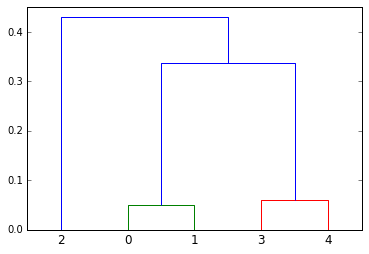

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(tf_idf, 'ward') # εκπαιδεύει τον αλγόριθμο
dendrogram(Z) # σχεδιάζει ένα δενδρόγραμμα με το αποτέλεσμα του ιεραρχικού αλγορίθμου
print

Παρατηρούμε ότι οι προτάσεις που βρίσκονται κοντά μεταξύ τους καταλήγουν και σε κοινά cluster. Θα προσπαθήσουμε να εφαρμόσουμε την τεχνική αυτή και σε ένα πραγματικό πρόβλημα με αληθινά κείμενα.

## Παράδειγμα clustering

Ως παράδειγμα θα χρησιμοποιήσουμε το [20 Newsgroups](http://qwone.com/~jason/20Newsgroups/) dataset, το οποίο υπάρχει και μέσα στο [sklearn](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html). Για το clustering θα χρησιμοποιήσουμε τον ιεραρχικό αλγόριθμο που μελετήσαμε προηγουμένως.

In [21]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='all')

Θα πάρουμε 3 κατηγορίες από το dataset αυτό και θα δημιουργήσουμε ένα corpus με τα πρώτα 5 κείμενα από κάθε κατηγορία. Για ευκολία θα επιλέξουμε 3 αρκετά ξεκάθαρες μεταξύ τους κατηγορίες.

In [22]:
categ = ['alt.atheism', 'comp.graphics', 'rec.sport.baseball']
data = reduce(lambda x,y: x+y, [fetch_20newsgroups(categories=[x], remove=('headers', 'footers'))['data'][:5] for x in categ])
print 'Input shape:', len(data), '\n'
print data[0][:500]

Input shape: 15 

In <16BA7103C3.I3150101@dbstu1.rz.tu-bs.de> I3150101@dbstu1.rz.tu-bs.de (Benedikt Rosenau) writes:

>In article <1993Apr5.091258.11830@monu6.cc.monash.edu.au>
>darice@yoyo.cc.monash.edu.au (Fred Rice) writes:
> 
>(Deletion)
>>>>Of course people say what they think to be the religion, and that this
>>>>is not exactly the same coming from different people within the
>>>>religion.  There is nothing with there existing different perspectives
>>>>within the religion -- perhaps one can say that they t


Για την προεπεξεραγασία των αρχείων θα χρησιμοποιήσουμε τη συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) του sklearn. Η συγκεκριμένη συνάρτηση έχει τη δυνατότητα να υποστηρίξει και όλη την [προεπεξεργασία](http://scikit-learn.org/stable/modules/feature_extraction.html#customizing-the-vectorizer-classes) που κάναμε προηγουμένως (stopwords, stemming, lematizing, κτλ). Επίσης δέχεται και πολλές επιπλέον παραμέτρους όπως την `max_df=x` η οποία αγνοεί τους όρους που εμφανίζονται στα κείμενα με συχνότητα πάνω από `x` (δηλ. λέξεις πολύ συχνές στο συγκεκριμένο σύνολο κειμένων), και την `min_df=y` η οποία αγνοεί τους όρους οι οποίοι εμφανίζονται λιγότερες από `y` φορές στο σύνολο (δηλ. πολύ σπάνιοι όροι). Για το παρακάτω παράδειγμα δεν θα εφαρμόσουμε stemming ή lemmatizing καθώς δεν βοηθάει στη συγκεκριμένη περίπτωση.

TF-IDF array shape: (15, 124)



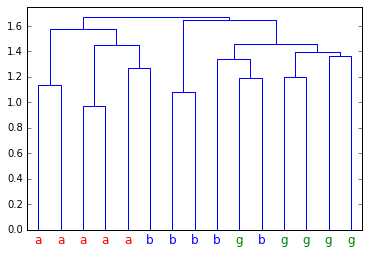

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df=0.5, min_df=2, stop_words='english')

tf_idf_array = vectorizer.fit_transform(data).toarray() # επιστρέφει sparse matrix, γι'αυτό το κάνουμε .toarray()
print 'TF-IDF array shape:', tf_idf_array.shape
Z = linkage(tf_idf_array, 'ward')

labels = ['a'] * 5 + ['g'] * 5 + ['b'] * 5 # 'a' = atheism, 'g' = graphics, 'b' = baseball 

dendrogram(Z, labels=labels, color_threshold=0)

colors = {'a':'r', 'g':'g', 'b':'b'}
for l in plt.gca().get_xticklabels():
    l.set_color(colors[l.get_text()])
print

Παρατηρούμε ότι όντως τοποθετεί με αρκετά καλή ακρίβεια τα κλαδιά που περιέχουν κείμενα από την ίδια κατηγορία. Επίσης ο αλγόριθμος αυτός μπορεί να εντοπίσει και ιεραρχίες εντός της κάθε ομάδας. (Σημ. σε ένα πραγματικό unsupervised πρόβλημα τα χρώματα και τα label στον άξονα x **δεν** είναι διαθέσιμα).

Θα δοκιμάσουμε επίσης για το ίδιο πρόβλημα και τον **k-means**, σε περισσότερα κείμενα. Πρώτα φορτώνουμε τα κείμενα...

In [24]:
categ = ['alt.atheism', 'comp.graphics', 'rec.sport.baseball']
data = reduce(lambda x,y: x+y, [fetch_20newsgroups(categories=[x], remove=('headers', 'footers'))['data'][:100] for x in categ])
print 'Σύνολο κειμένων:', len(data)

Σύνολο κειμένων: 300


Στη συνέχεια εφαρμόζουμε την προεπεξεργασία και τρέχουμε τον k-means για διάφορα k για να βρούμε το βέλτιστο.

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
tf_idf_array = vectorizer.fit_transform(data)

silhouette_scores = []
for k in range(2, 10):
    km = KMeans(k)
    preds = km.fit_predict(tf_idf_array)
    silhouette_scores.append(silhouette_score(tf_idf_array, preds))

Σχεδιάζουμε τη γραφική του silhouette και βρίσκουμε το βέλτιστο k. Αυτό αντιπροσωπεύει τον αριθμό των κατηγοριών στις οποίες ανήκουν τα κείμενά μας.

Maximum average silhouette score for k = 3


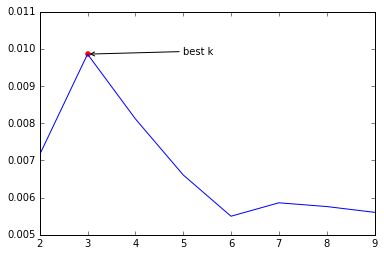

In [26]:
plt.plot(range(2, 10), silhouette_scores)
best_k = np.argmax(silhouette_scores) + 2 # +2 γιατί ξεκινάμε το range() από k=2 και όχι από 0 που ξεκινάει η αρίθμηση της λίστας
plt.scatter(best_k, silhouette_scores[best_k-2], color='r') # για τον ίδιο λόγο το καλύτερο k είναι αυτό 2 θέσεις παρακάτω από το index της λίστας
plt.xlim([2,9])
plt.annotate("best k", xy=(best_k, silhouette_scores[best_k-2]), xytext=(5, silhouette_scores[best_k-2]),arrowprops=dict(arrowstyle="->")) # annotation
print 'Maximum average silhouette score for k =', best_k

Με το κριτήριο silhouette βρήκαμε 3 cluster στα κείμενά μας, όσες κατηγορίες είχαμε και αρχικά.
Ας εκτυπώσουμε τις ετικέτες που μας δίνει ο k-means:

In [27]:
km = KMeans(best_k)
km.fit(tf_idf_array)
print km.labels_

[2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 1 2 2 2 2 2 1
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 2 0 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 1 0 1 0 0 0 2 0 0 2 0 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 1 2 1 1 1 1 2 2 1 1 1 2 1 1 1 0 0 2 0 1 1 1
 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 0 1 0 1 0 1 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 0 1 1 1 1 1 1 1 2 1 1 1 1 1 2 1 1 1 0 2 1 1 1 1 1 1 1 0 1 1
 0 2 1 0]


Ξέρουμε ότι στο σύνολό μας, τα πρώτα 100 κείμενα ανήκουν στην 1η κατηγορία, τα επόμενα 100 στη δεύτερη, κτλ. Από τις παραπάνω προβλέψεις βλέπουμε ότι τα έχει πάει αρκετά καλά ο k-means.
Για να δούμε για ποιο πράγμα μιλάει η κάθε κατηγορία, μπορούμε να βρούμε τους top όρους για κάθε ομάδα.

In [28]:
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(best_k):
    out = "Cluster %d:" % i
    for ind in order_centroids[i, :20]:
        out += ' %s' % terms[ind]
    print out

Cluster 0: thanks image graphics does hi know files card program help information looking mail appreciated file software color images vga ftp
Cluster 1: edu year game team games better article hitter baseball like good season hit pitching cubs time clemens win new going
Cluster 2: god edu people don article think com just say believe atheism know religion book does way exist wrong read atheists


Οι όροι βλέπουμε ότι έχουν όντως σχέση με το περιεχόμενο των κειμένων. Μπορούμε να τυπώσουμε και περισσότερα clusters και να διαπιστώσουμε ότι και αυτά έχουν σημασιολογική συνοχή.

In [29]:
km = KMeans(10)
km.fit(tf_idf_array)
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    out = "Cluster %d:" % i
    for ind in order_centroids[i, :20]:
        out += ' %s' % terms[ind]
    print out

Cluster 0: gov points ellipse john center problem offset email method sphere washington bolson radius nasa cubs chuck solution mark matthew subject
Cluster 1: know lot com better mary alomar money year baseball edu jewish players article joseph sun baerga salaries fans thomas home
Cluster 2: uk islamic ac law laws bu jaeger bcci ftp article religion tried bank sure germany war gregg community com livesey
Cluster 3: god edu atheism islam existence believe exist universe question muslim does jaeger think article bu com statement rushdie faith true
Cluster 4: thanks com baseball read just edu article think don newsgroup like people files maybe come reading colorado group scott texas
Cluster 5: image graphics program software file package files version images use unix comp code know write interested thanks data hardware hi
Cluster 6: card vga appreciated windows help does driver thanks looking know color colors greatly send anybody hi 256 graphics au ram
Cluster 7: people edu just don mora